In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [2]:
df_orignal=pd.read_csv("Suicide_Detection.csv")

In [3]:
df1 = df_orignal.copy()

In [4]:
df1.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [6]:
df1.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [7]:
df = df1[['text','class']].rename(columns={'text': 'text', 'class': 'classification'})

In [8]:
df.head()

,text,classification
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [9]:
df.describe().T

,count,unique,top,freq
text,232074,232074,I still haven't beaten the first boss in Hollo...,1
classification,232074,2,suicide,116037


In [10]:
df.classification.unique()

array(['suicide', 'non-suicide'], dtype=object)

In [11]:
df.shape

(232074, 2)

In [12]:
len(df[df.duplicated()])

0

In [13]:
df["text"]=df["text"].str.lower()

In [14]:
df["text"]

0         ex wife threatening suiciderecently i left my ...
1         am i weird i don't get affected by compliments...
2         finally 2020 is almost over... so i can never ...
3                 i need helpjust help me im crying so hard
4         i’m so losthello, my name is adam (16) and i’v...
                                ...                        
232069    if you don't like rock then your not going to ...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    the usual stuff you find herei'm not posting t...
232073    i still haven't beaten the first boss in hollo...
Name: text, Length: 232074, dtype: object

In [15]:
df["text"][0]

"ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her. as of a few days ago, she began threatening suicide. i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe i'll come back. i know a lot of people will threaten this in order to get their way, but what happens if she really does? what do i do and how am i supposed to handle her death on my hands? i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure. i'm worried today may be the day she does it and i hope so much it doesn't happen."

In [16]:
df["text"]  = df["text"].str.replace('http\S+|www.\S+', '', case=False)

In [17]:
import string
def remove_punctuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, "")
  return text

In [18]:
df["clean_text"] = df["text"].apply(remove_punctuations)

In [19]:
df["clean_text"]

0         ex wife threatening suiciderecently i left my ...
1         am i weird i dont get affected by compliments ...
2         finally 2020 is almost over so i can never hea...
3                 i need helpjust help me im crying so hard
4         i’m so losthello my name is adam 16 and i’ve b...
                                ...                        
232069    if you dont like rock then your not going to g...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    the usual stuff you find hereim not posting th...
232073    i still havent beaten the first boss in hollow...
Name: clean_text, Length: 232074, dtype: object

In [20]:
df["clean_text"] = df["clean_text"].str.replace("[^a-zA-Z#//]"," ")

In [21]:
df["clean_text"]

0         ex wife threatening suiciderecently i left my ...
1         am i weird i dont get affected by compliments ...
2         finally 2020 is almost over so i can never hea...
3                 i need helpjust help me im crying so hard
4         i’m so losthello my name is adam 16 and i’ve b...
                                ...                        
232069    if you dont like rock then your not going to g...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    the usual stuff you find hereim not posting th...
232073    i still havent beaten the first boss in hollow...
Name: clean_text, Length: 232074, dtype: object

In [22]:
df["clean_text"] = df["clean_text"].str.replace("\n", " ")

In [23]:
df["clean_text"]

0         ex wife threatening suiciderecently i left my ...
1         am i weird i dont get affected by compliments ...
2         finally 2020 is almost over so i can never hea...
3                 i need helpjust help me im crying so hard
4         i’m so losthello my name is adam 16 and i’ve b...
                                ...                        
232069    if you dont like rock then your not going to g...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea😏💦‼️ can som...
232072    the usual stuff you find hereim not posting th...
232073    i still havent beaten the first boss in hollow...
Name: clean_text, Length: 232074, dtype: object

In [24]:
df["clean_text"][0]

'ex wife threatening suiciderecently i left my wife for good because she has cheated on me twice and lied to me so much that i have decided to refuse to go back to her as of a few days ago she began threatening suicide i have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe ill come back i know a lot of people will threaten this in order to get their way but what happens if she really does what do i do and how am i supposed to handle her death on my hands i still love my wife but i cannot deal with getting cheated on again and constantly feeling insecure im worried today may be the day she does it and i hope so much it doesnt happen'

In [25]:
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords

In [26]:
df.head()

,text,classification,clean_text
0,ex wife threatening suiciderecently i left my ...,suicide,ex wife threatening suiciderecently i left my ...
1,am i weird i don't get affected by compliments...,non-suicide,am i weird i dont get affected by compliments ...
2,finally 2020 is almost over... so i can never ...,non-suicide,finally 2020 is almost over so i can never hea...
3,i need helpjust help me im crying so hard,suicide,i need helpjust help me im crying so hard
4,"i’m so losthello, my name is adam (16) and i’v...",suicide,i’m so losthello my name is adam 16 and i’ve b...


In [27]:
#Importing Stop-words
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/srmist9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def remove_stopwords(stuff):
  stuff = [word.lower() for word in stuff.split() if word.lower() not in stop]
  return (stuff)

In [29]:
from nltk.stem.porter import*
stemmer = PorterStemmer()

In [30]:
def stemming(stuff):
  text = [stemmer.stem(word) for word in stuff]
  return (" ".join(stuff))

In [31]:
import os
import pickle

# File to save/load the stemmed text
pickle_file = "stemmed_text.pkl"

# Check if the pickle file already exists
if os.path.exists(pickle_file):
    # Load the DataFrame from the pickle file
    with open(pickle_file, "rb") as file:
        df = pickle.load(file)
    print("Loaded DataFrame from pickle file.")
else:

    df["clean_text"] = df["clean_text"].apply(lambda x: remove_stopwords(x))
    df["clean_text"][6]
    
    # Perform stemming if pickle file does not exist
    df["stemmed"] = df["clean_text"].apply(lambda x: stemming(x))
    
    # Save the DataFrame with the stemmed text to a pickle file
    with open(pickle_file, "wb") as file:
        pickle.dump(df, file)
    print("Stemmed text saved to pickle file.")

# Display the first 5 rows of the stemmed column
print(df["stemmed"].head())

Loaded DataFrame from pickle file.
0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments coming som...
2    finally 2020 almost never hear 2020 bad year e...
3                    need helpjust help im crying hard
4    i’m losthello name adam 16 i’ve struggling yea...
Name: stemmed, dtype: object


In [32]:
df.stemmed.head

<bound method NDFrame.head of 0         ex wife threatening suiciderecently left wife ...
1         weird dont get affected compliments coming som...
2         finally 2020 almost never hear 2020 bad year e...
3                         need helpjust help im crying hard
4         i’m losthello name adam 16 i’ve struggling yea...
                                ...                        
232069    dont like rock going get anything go httpsmusi...
232070    tell many friends lonely everything deprived p...
232071    pee probably tastes like salty tea😏💦‼️ someone...
232072    usual stuff find hereim posting sympathy pity ...
232073    still havent beaten first boss hollow knight i...
Name: stemmed, Length: 232074, dtype: object>

In [33]:
from nltk import wsd
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import wordnet as wn
from spacy.cli import download
from spacy import load
import warnings

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
# nlp = load('en_core_web_sm')

! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

[nltk_data] Downloading package omw-1.4 to /home/srmist9/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/srmist9/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     /home/srmist9/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


cp: cannot stat '/usr/share/nltk_data/corpora/wordnet2022': No such file or directory


In [34]:
import os
import pickle
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# File to save/load the lemmatized text
pickle_file = "lemmatized_text.pkl"

# Check if the pickle file already exists
if os.path.exists(pickle_file):
    # Load the DataFrame from the pickle file
    with open(pickle_file, "rb") as file:
        df = pickle.load(file)
    print("Loaded DataFrame with lemmatized text from pickle file.")
else:
    # Perform lemmatization if pickle file does not exist
    df['lemmed'] = df['clean_text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
    
    # Save the DataFrame with the lemmatized text to a pickle file
    with open(pickle_file, "wb") as file:
        pickle.dump(df, file)
    print("Lemmatized text saved to pickle file.")

# Display the first 5 rows of the lemmatized column
print(df['lemmed'].head())

Loaded DataFrame with lemmatized text from pickle file.
0    [ex, wife, threatening, suiciderecently, left,...
1    [weird, dont, get, affected, compliment, comin...
2    [finally, 2020, almost, never, hear, 2020, bad...
3                [need, helpjust, help, im, cry, hard]
4    [i’m, losthello, name, adam, 16, i’ve, struggl...
Name: lemmed, dtype: object


In [35]:
df.head()

,text,classification,clean_text,stemmed,lemmed
0,ex wife threatening suiciderecently i left my ...,suicide,"[ex, wife, threatening, suiciderecently, left,...",ex wife threatening suiciderecently left wife ...,"[ex, wife, threatening, suiciderecently, left,..."
1,am i weird i don't get affected by compliments...,non-suicide,"[weird, dont, get, affected, compliments, comi...",weird dont get affected compliments coming som...,"[weird, dont, get, affected, compliment, comin..."
2,finally 2020 is almost over... so i can never ...,non-suicide,"[finally, 2020, almost, never, hear, 2020, bad...",finally 2020 almost never hear 2020 bad year e...,"[finally, 2020, almost, never, hear, 2020, bad..."
3,i need helpjust help me im crying so hard,suicide,"[need, helpjust, help, im, crying, hard]",need helpjust help im crying hard,"[need, helpjust, help, im, cry, hard]"
4,"i’m so losthello, my name is adam (16) and i’v...",suicide,"[i’m, losthello, name, adam, 16, i’ve, struggl...",i’m losthello name adam 16 i’ve struggling yea...,"[i’m, losthello, name, adam, 16, i’ve, struggl..."


In [36]:
classification_counts = df['classification'].value_counts().reset_index()
classification_counts.columns = ['Classification', 'Count']
print(classification_counts)

  Classification   Count
0        suicide  116037
1    non-suicide  116037


Text(0, 0.5, 'Count')

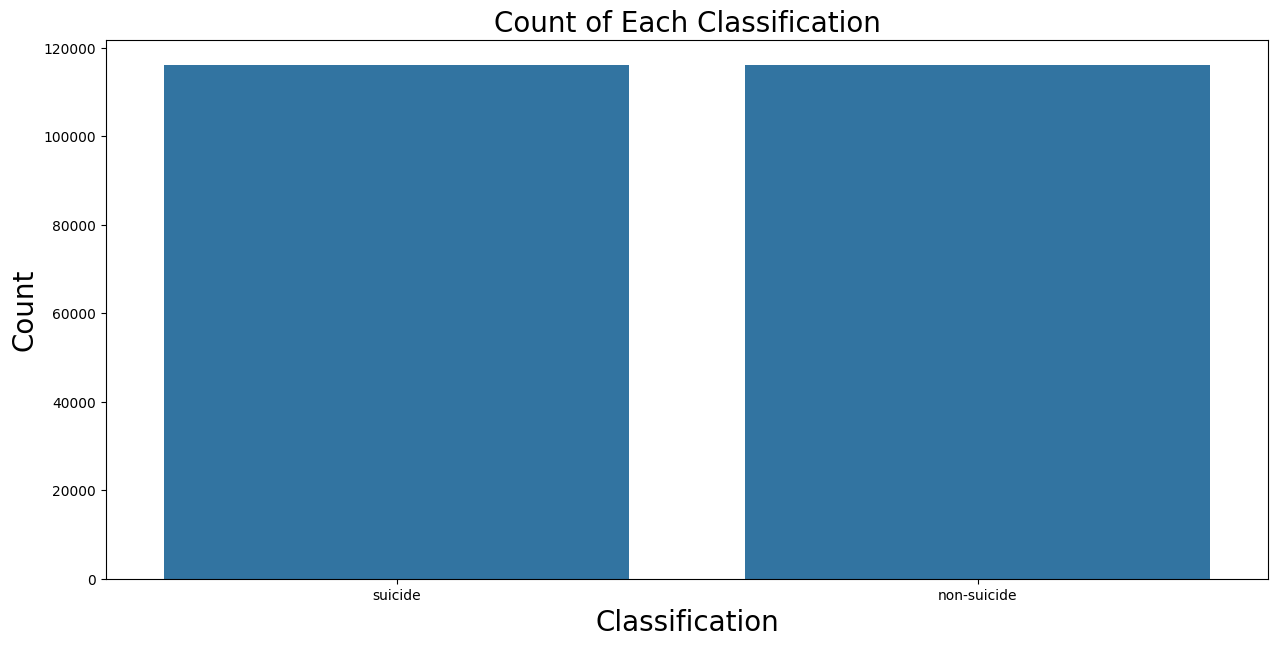

In [37]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='Classification', y='Count', data=classification_counts)
ax.set_title("Count of Each Classification", fontsize=20)
ax.set_xlabel("Classification", fontsize=20)
ax.set_ylabel("Count", fontsize=20)

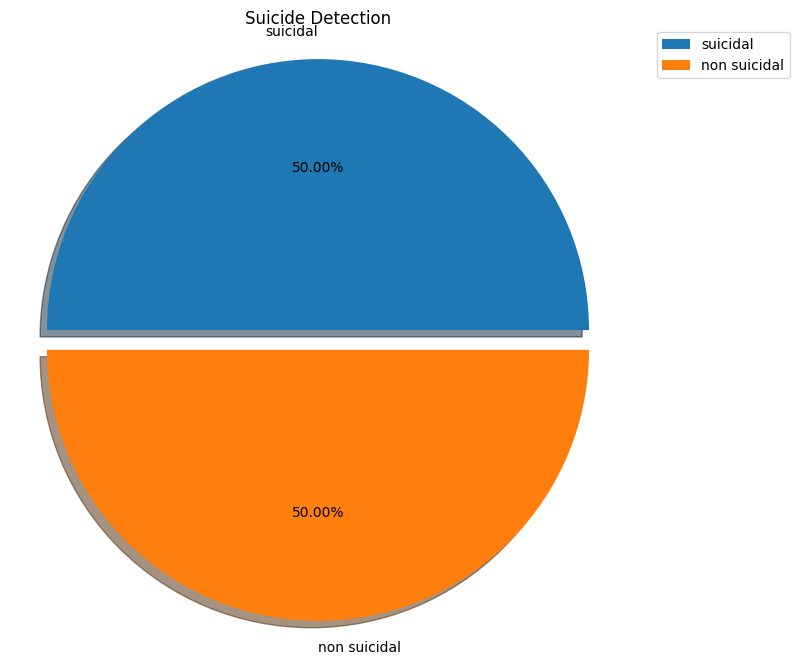

In [38]:
classification_count1 = df["classification"].value_counts().to_list()
labels=["suicidal","non suicidal"]
plt.figure(figsize = [10,8])
plt.pie(x=classification_count1,explode=[0.04,0.04],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Suicide Detection")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", borderaxespad=0)
plt.show()

In [39]:
df['temp_list'] = df['clean_text'].apply(lambda x:str(x).split())

In [40]:
from collections import Counter
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,"'im',",241018
1,"'like',",179022
2,"'dont',",156100
3,"'want',",142693
4,"'know',",127178
5,"'feel',",118793
6,"'life',",115594
7,"'get',",109187
8,"'people',",91083
9,"'even',",90340


In [41]:
#seperating the sentiments for word cloud
suicide = pd.DataFrame(df[['stemmed','lemmed']]  [df['classification'] == 'suicide'])
nonsuicide = pd.DataFrame(df[['stemmed','lemmed']]  [df['classification'] == 'non-suicide'])

In [42]:
# Define figure size (rectangle)
width, height = 800, 400  # Adjust as needed


In [43]:
# Create a plain white rectangular mask
mask = np.ones((height, width), dtype=np.uint8) * 255  # White rectangle



In [44]:
# Generate WordCloud
wc = WordCloud(
    background_color='white',
    width=width,
    height=height,
    contour_width=1,
    contour_color='steelblue'
)



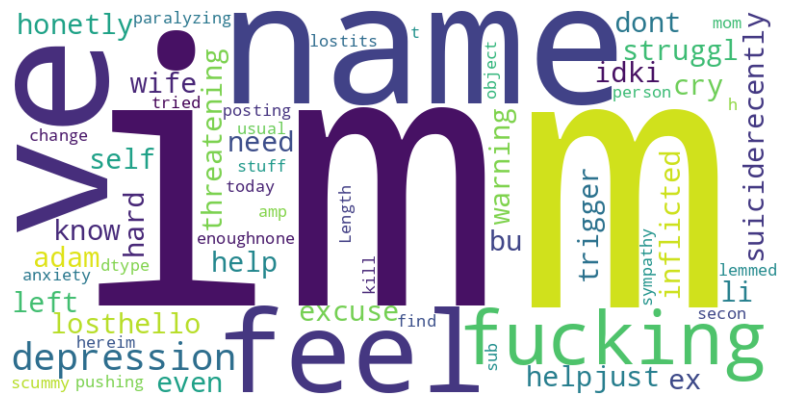

In [45]:
wc.generate(str(suicide['lemmed']))

# Display the WordCloud
plt.figure(figsize=(10, 5))  # Adjust as needed
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

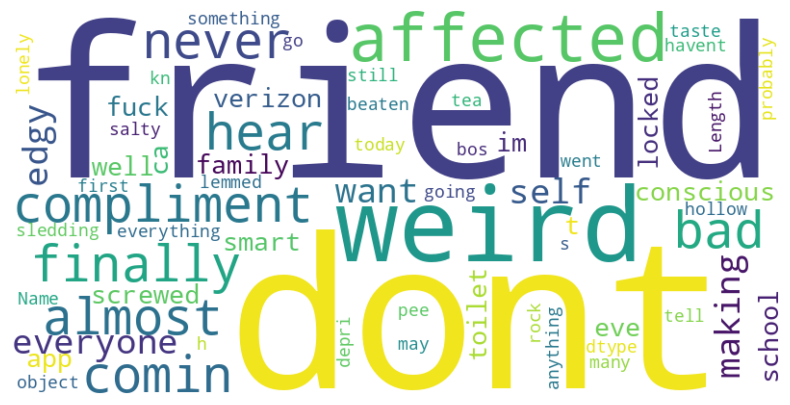

In [46]:
wc.generate(str(nonsuicide['lemmed']))

# Display the WordCloud
plt.figure(figsize=(10, 5))  # Adjust as needed
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
x=df["lemmed"]
y=df["classification"]

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=10)

In [49]:
print(x_train.shape)
y_test.shape

(185659,)


(46415,)

In [50]:
print(x_train.head())
y_train.head()

111125    [random, thought, monday, take, 3, guy, ever, ...
177267    , bored, hell, looking, friend, hey, alrig...
21488     [stay, dad, 2, day, maybe, get, high, sorry, i...
230666                                  [woke, thigh, sore]
184512    [two, hour, fuckening, got, 6, geography, toda...
Name: lemmed, dtype: object


111125    non-suicide
177267    non-suicide
21488     non-suicide
230666    non-suicide
184512    non-suicide
Name: classification, dtype: object

In [51]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# File paths for saving the vectorizers and transformed data
cv_pickle_file = "count_vectorizer.pkl"
tv_pickle_file = "tfidf_vectorizer.pkl"
cv_train_data_file = "cv_x_train.pkl"
tv_train_data_file = "tv_x_train.pkl"

# Check if the vectorizers and transformed data already exist
if all([os.path.exists(cv_pickle_file), os.path.exists(tv_pickle_file), 
        os.path.exists(cv_train_data_file), os.path.exists(tv_train_data_file)]):
    # Load the vectorizers and transformed data
    with open(cv_pickle_file, "rb") as file:
        cv = pickle.load(file)
    with open(tv_pickle_file, "rb") as file:
        tv = pickle.load(file)
    with open(cv_train_data_file, "rb") as file:
        cv_x_train = pickle.load(file)
    with open(tv_train_data_file, "rb") as file:
        tv_x_train = pickle.load(file)
    print("Loaded CountVectorizer, TfidfVectorizer, and transformed data from pickle files.")
else:
    # Initialize and fit the vectorizers
    cv = CountVectorizer(binary=False, max_df=1.0, min_df=5, ngram_range=(1, 2))
    cv_x_train = cv.fit_transform(x_train.astype(str).str.strip())
    
    tv = TfidfVectorizer(use_idf=True, max_df=1.0, min_df=5, ngram_range=(1, 2), sublinear_tf=True)
    tv_x_train = tv.fit_transform(x_train.astype(str).str.strip())
    
    # Save the vectorizers and transformed data to pickle files
    with open(cv_pickle_file, "wb") as file:
        pickle.dump(cv, file)
    with open(tv_pickle_file, "wb") as file:
        pickle.dump(tv, file)
    with open(cv_train_data_file, "wb") as file:
        pickle.dump(cv_x_train, file)
    with open(tv_train_data_file, "wb") as file:
        pickle.dump(tv_x_train, file)
    print("Saved CountVectorizer, TfidfVectorizer, and transformed data to pickle files.")

# Transform the test data using the loaded or newly fitted vectorizers
cv_x_test = cv.transform(x_test.astype(str).str.strip())
tv_x_test = tv.transform(x_test.astype(str).str.strip())

# Display the shapes of the transformed data
print("cv_x_train shape:", cv_x_train.shape)
print("tv_x_train shape:", tv_x_train.shape)
print("cv_x_test shape:", cv_x_test.shape)
print("tv_x_test shape:", tv_x_test.shape)

Loaded CountVectorizer, TfidfVectorizer, and transformed data from pickle files.
cv_x_train shape: (185659, 336701)
tv_x_train shape: (185659, 336701)
cv_x_test shape: (46415, 336701)
tv_x_test shape: (46415, 336701)


GNB sir

In [52]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


📌 Model file found! Loading the saved model...
🔹 Model loaded, no training required
🔹 Testing Time: 0.0404 seconds
🔹 Accuracy: 0.9119
🔹 Precision: 0.8709
🔹 Recall: 0.9672
🔹 F1 Score: 0.9165


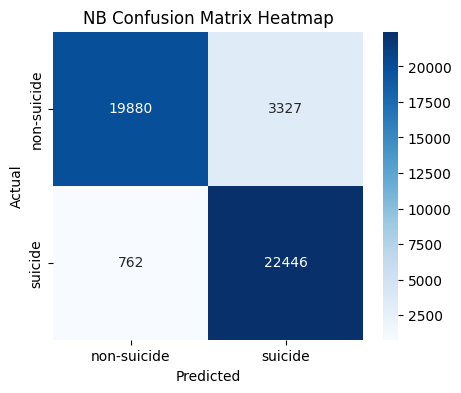

In [53]:
import os
import joblib
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import time
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Model file path
model_filename = "naive_bayes_model.pkl"

if os.path.exists(model_filename):
    print("📌 Model file found! Loading the saved model...")
    nb_model = joblib.load(model_filename)  # Load model
else:
    print("🚀 No saved model found! Training a new model...")

    # Initialize the model
    nb_cv = MultinomialNB()
    parameters = {
        'alpha': [2.0, 1.0, 0.5, 0.1, 0.05, 0.01, 0.001],  # More refined values for smoothing
        'fit_prior': [True, False]  # Whether to learn class priors
    }

    # Hyperparameter tuning using GridSearchCV
    nb_Gcv = GridSearchCV(nb_cv, parameters, cv=5)

    # Start training time measurement
    start_train = time.time()
    nb_Gcv.fit(cv_x_train, y_train)  # Train the model
    end_train = time.time()

    # Save the best model
    joblib.dump(nb_Gcv.best_estimator_, model_filename)
    print("✅ Model training complete and saved as:", model_filename)

    # Assign best estimator to variable
    nb_model = nb_Gcv.best_estimator_

# Start testing time measurement
start_test = time.time()
y_pred = nb_model.predict(cv_x_test)  # Predict using the loaded/trained model
end_test = time.time()

# Performance evaluation
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  
y_pred_encoded = label_encoder.transform(y_pred)      

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='binary')
recall = recall_score(y_test_encoded, y_pred_encoded, average='binary')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='binary')

print(f"\n🔹 Training Time: {end_train - start_train:.4f} seconds" if not os.path.exists(model_filename) else "🔹 Model loaded, no training required")
print(f"🔹 Testing Time: {end_test - start_test:.4f} seconds")
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# Save predictions and metrics
y_results_df = pd.DataFrame({"Actual Labels": y_test, "Predicted Labels": y_pred})
y_results_df.to_excel("NB_y_results.xlsx", index=False)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [accuracy, precision, recall, f1]
})
metrics_df.to_excel("NB_model_metrics.xlsx", index=False)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("NB Confusion Matrix Heatmap")

# Save the confusion matrix plot
plt.savefig("NB_confusion_matrix.png")
plt.show()


📌 Model file found! Loading the saved model...
🔹 Model loaded, no training required
🔹 Testing Time: 0.0273 seconds
🔹 Accuracy: 0.9233
🔹 Precision: 0.8928
🔹 Recall: 0.9622
🔹 F1 Score: 0.9262


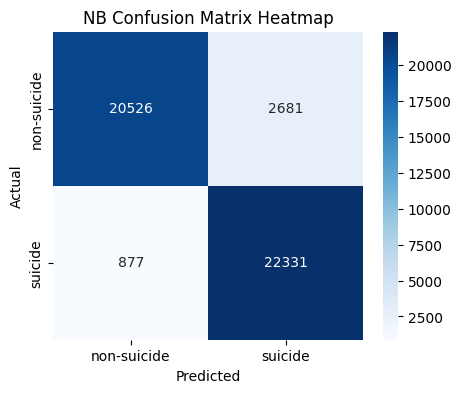

In [54]:
import os
import joblib
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Model file path
model_filename = "naive_bayes_tv_model.pkl"

if os.path.exists(model_filename):
    print("📌 Model file found! Loading the saved model...")
    nb_model = joblib.load(model_filename)  # Load model
else:
    print("🚀 No saved model found! Training a new model...")

    # Initialize the model
    nb_cv = MultinomialNB()
    parameters = {
        'alpha': [2.0, 1.0, 0.5, 0.1, 0.05, 0.01, 0.001],  # More refined values for smoothing
        'fit_prior': [True, False]  # Whether to learn class priors
    }

    # Hyperparameter tuning using GridSearchCV
    nb_Gcv = GridSearchCV(nb_cv, parameters, cv=5)

    # Start training time measurement
    start_train = time.time()
    nb_Gcv.fit(tv_x_train, y_train)  # Train the model
    end_train = time.time()

    # Save the best model
    joblib.dump(nb_Gcv.best_estimator_, model_filename)
    print("✅ Model training complete and saved as:", model_filename)

    # Assign best estimator to variable
    nb_model = nb_Gcv.best_estimator_

# Start testing time measurement
start_test = time.time()
y_pred = nb_model.predict(tv_x_test)  # Predict using the loaded/trained model
end_test = time.time()

# Performance evaluation
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  
y_pred_encoded = label_encoder.transform(y_pred)      

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision = precision_score(y_test_encoded, y_pred_encoded, average='binary')
recall = recall_score(y_test_encoded, y_pred_encoded, average='binary')
f1 = f1_score(y_test_encoded, y_pred_encoded, average='binary')

print(f"\n🔹 Training Time: {end_train - start_train:.4f} seconds" if not os.path.exists(model_filename) else "🔹 Model loaded, no training required")
print(f"🔹 Testing Time: {end_test - start_test:.4f} seconds")
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# Save predictions and metrics
y_results_df = pd.DataFrame({"Actual Labels": y_test, "Predicted Labels": y_pred})
y_results_df.to_excel("NB_tv_y_results.xlsx", index=False)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Value": [accuracy, precision, recall, f1]
})
metrics_df.to_excel("NB_tv_model_metrics.xlsx", index=False)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("NB Confusion Matrix Heatmap")

# Save the confusion matrix plot
plt.savefig("NB_tv_confusion_matrix.png")
plt.show()
